# Udemy Online Education Courses
## Column definition
1. **course_id**: Unique identifier for each course.  
2. **course_title**: Title of the course.  
3. **url**: Link to the course.  
4. **is_paid**: Whether the course is paid or free (boolean).  
5. **price**: Price of the course in dollars.  
6. **num_subscribers**: Number of students enrolled in the course.  
7. **num_reviews**: Number of reviews for the course.  
8. **num_lectures**: Number of lectures in the course.  
9. **level**: Course difficulty.  
10. **content_duration**: Total duration of the course (in hours).  
11. **published_timestamp**: Date when the course was published.  
12. **subject**: Subject category of the course.  
                                                                                                                      

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\Work Force\Downloads\udemy_online_education_courses_dataset.csv")
df.reset_index()

df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
df.set_index('course_id',inplace=True)

In [5]:
#making a copy of data for cleaning
df2=df.copy()

In [6]:
#shape of the data
df2.shape

(3678, 11)

In [7]:
#dlets check the column
df2.columns

Index(['course_title', 'url', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [8]:
#renaming the price column
df2.rename(columns={'price':'price_usd'},inplace=True)

## Data cleaning

In [10]:
# checking for null values
df2.isna().sum()

course_title           0
url                    0
is_paid                0
price_usd              0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [11]:
#duplicates
df2[df2.duplicated()==1]

,course_title,url,is_paid,price_usd,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development


In [12]:
#locating the duplicates
df2.loc[837322,:]

,course_title,url,is_paid,price_usd,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance


In [13]:
#dropping the duplicates
df2.drop_duplicates(inplace=True)

In [14]:
#data types
df2.dtypes

course_title            object
url                     object
is_paid                   bool
price_usd                int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [15]:
#splitting published_timestamp to remain with date only and convert it to date
df2['published_date']=df2.published_timestamp.str.split(pat='T').str[0]

In [16]:
df2.drop(['published_timestamp'],axis=1,inplace=True)

In [17]:
#converting to date

df2['published_date']=pd.to_datetime(df2['published_date']).dt.date

In [18]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price_usd,3672.0,66.102941,61.035920,0.0,20.00,45.0,95.00,200.0
num_subscribers,3672.0,3190.586874,9488.105448,0.0,111.75,912.0,2548.75,268923.0
num_reviews,3672.0,156.371460,936.178649,0.0,4.00,18.0,67.00,27445.0
num_lectures,3672.0,40.140251,50.417102,0.0,15.00,25.0,46.00,779.0
content_duration,3672.0,4.097603,6.057830,0.0,1.00,2.0,4.50,78.5


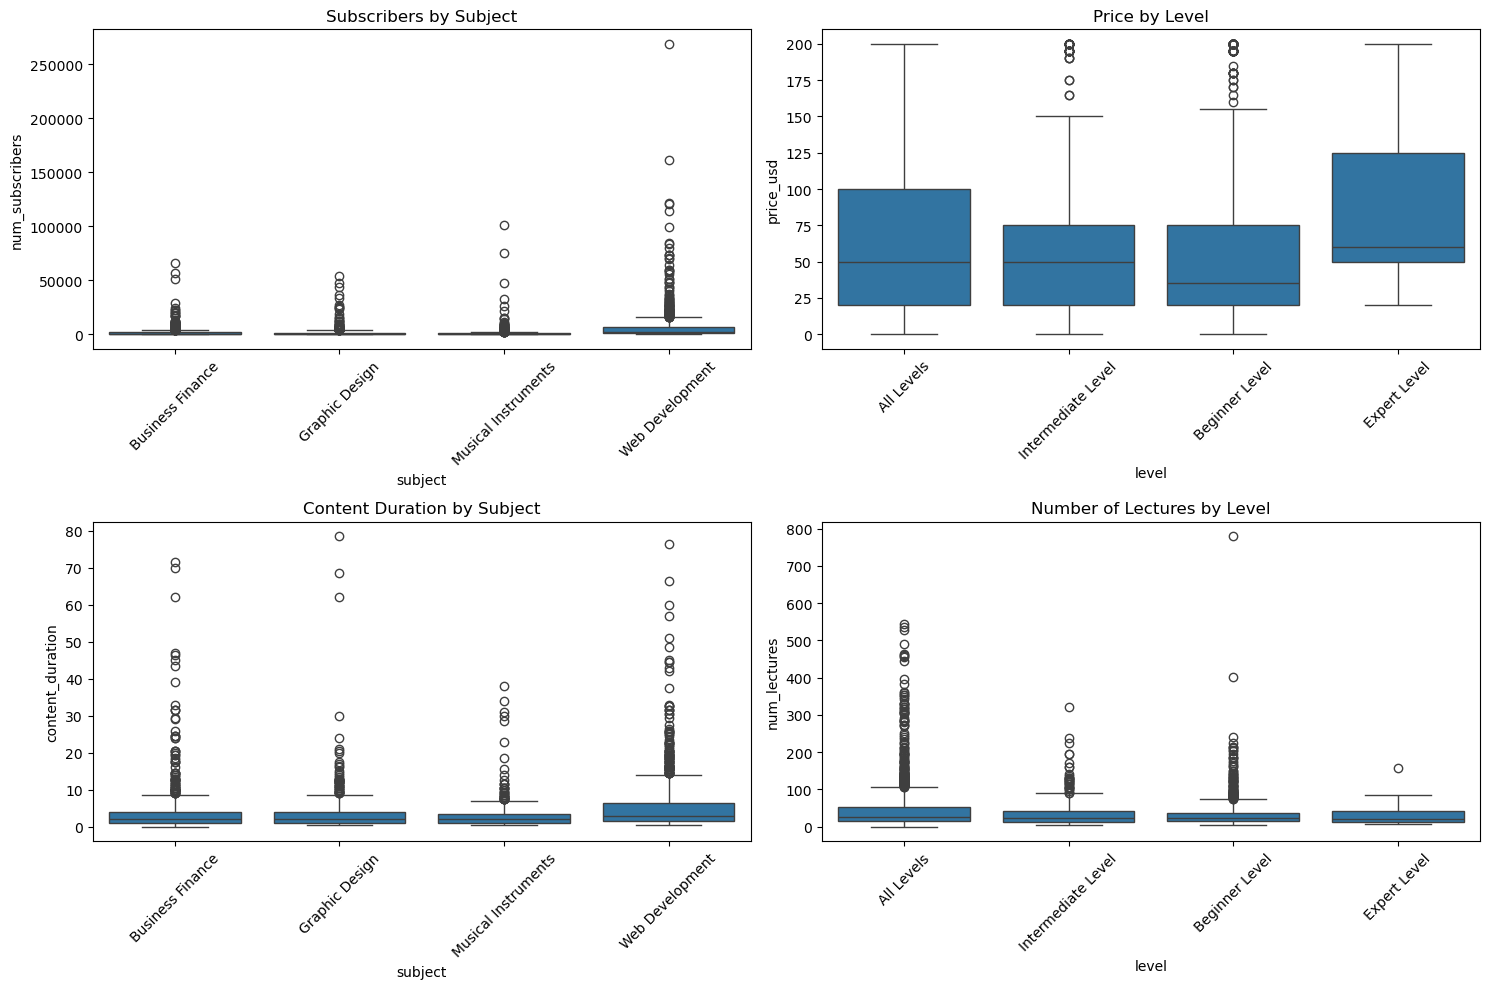

In [19]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#  Subject vs. Number of Subscribers
sns.boxplot(data=df2, x='subject', y='num_subscribers', ax=axes[0, 0])
axes[0, 0].set_title('Subscribers by Subject')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Level vs. Price
sns.boxplot(data=df2, x='level', y='price_usd', ax=axes[0, 1])
axes[0, 1].set_title('Price by Level')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

#  Duration vs. Subject
sns.boxplot(data=df2, x='subject', y='content_duration', ax=axes[1, 0])
axes[1, 0].set_title('Content Duration by Subject')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Number of Lectures
sns.boxplot(data=df2, x='level', y='num_lectures', ax=axes[1, 1])
axes[1, 1].set_title('Number of Lectures by Level')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


1. Subscribers by Subject  
The median number of subscribers is relatively low for all subjects.  
**Web Development** has the highest variation, with several outliers representing courses with high number of subscribers.  
Other subjects like Graphic Design and Business Finance also show a few courses with high subscribers.  

2. Price by Level   
Courses in the Expert Level category tend to have the highest prices, as shown by the higher median and longer upper whisker.  
All Levels courses show the widest price range, suggesting courses targeting broader audiences vary significantly in pricing.  
Beginner and Intermediate Level courses tend to be more affordable.

3. Content Duration by Subject  
Most courses across all subjects have a short duration (median is low), with outliers representing longer courses.  
Web Development has the highest number of long-duration courses ( > 50 hours), likely reflecting the complexity of the subject.    
Musical Instruments has fewer long-duration courses compared to other subjects.  

5. Number of Lectures by Level   
The number of lectures varies widely within each course level, with Beginner Level and All Levels showing more outliers for high lecture counts.  
Expert Level courses tend to have fewer lectures overall.    


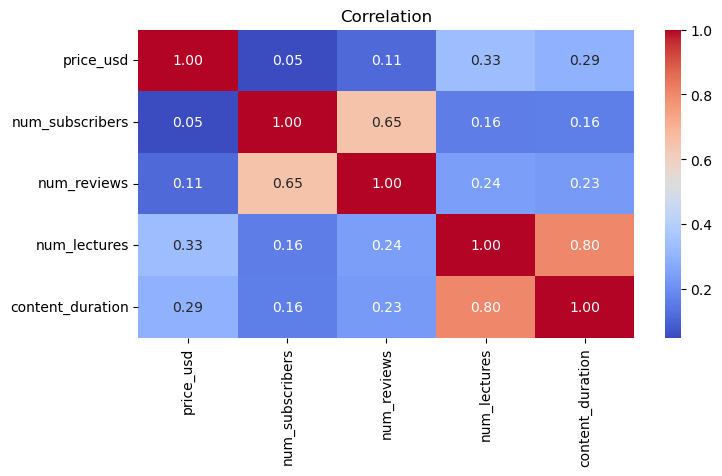

In [21]:
correlation=df2[[ 'price_usd', 'num_subscribers',
       'num_reviews', 'num_lectures', 'content_duration',
       ]].corr()
plt.figure(figsize=(8,4))
sns.heatmap(data=correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation')
plt.show()

Most of the variables shows a weak correlation.  
There is a **strong positive** correlation between **number of subscribers** and **number of reviews** **0.65**. This shows that, the more the number of subscribers, the more the number of reviews.  
**Number of lecturers** and **content duration**, have a strong correlation **0.80**, courses with longer duration, tend to have high number of lectures.  
Course price does not really affect other variables since it shows weak correlation with all the variables.




subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7937287
Name: num_subscribers, dtype: int64


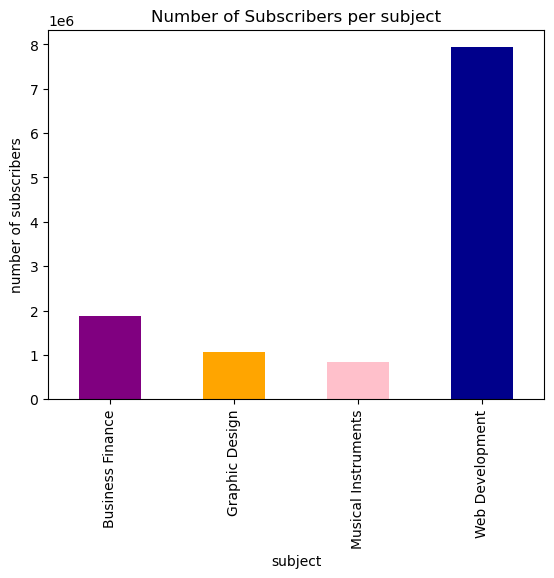

In [22]:
# number of suncribers per subject
subject_subscribers=df2.groupby(['subject'])['num_subscribers'].sum()
print(subject_subscribers)
#visualize it on a bar graph
colors=['purple','orange','pink','darkblue']
subject_subscribers.plot(kind='bar',ylabel='number of subscribers',color=colors)
plt.title('Number of Subscribers per subject')
plt.show()

**Web development** is the **most subscribed** subject with **7,937,287** subscribers.  
**Musical instruments** has less **than a million** subscribers.  
**Business Finance** has **1,868,711** subscribers while **Graphic Design** has **1,063,148** subscribers.

In [24]:
#the most subscribed courses per subject
#1: web development
web_dev_course=df2[df2.subject=='Web Development']
most_subscribed=web_dev_course[web_dev_course.num_subscribers>100000].sort_values(by='num_subscribers', ascending=False)
most_subscribed[['course_title','level','price_usd','num_subscribers','content_duration']]

,course_title,level,price_usd,num_subscribers,content_duration
course_id,,,,,
41295,Learn HTML5 Programming From Scratch,All Levels,0,268923,10.5
59014,Coding for Entrepreneurs Basic,Beginner Level,0,161029,3.5
625204,The Web Developer Bootcamp,All Levels,200,121584,43.0
173548,Build Your First Website in 1 Week with HTML5 ...,Beginner Level,0,120291,3.0
764164,The Complete Web Developer Course 2.0,All Levels,200,114512,30.5


In [25]:
web_dev_course.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price_usd,1199.0,77.035029,66.108024,0.0,20.0,50.0,115.0,200.0
num_subscribers,1199.0,6619.922435,14581.350014,19.0,1127.0,2412.0,6873.0,268923.0
num_reviews,1199.0,358.215179,1575.464236,0.0,25.0,65.0,179.0,27445.0
num_lectures,1199.0,52.841535,62.834440,5.0,19.0,32.0,63.5,779.0
content_duration,1199.0,5.596122,7.252431,0.5,1.5,3.0,6.5,76.5


In [26]:
#2: Business Finance
business_course=df2[df2.subject=='Business Finance']
most_subscribed=business_course[business_course.num_subscribers>50000].sort_values(by='num_subscribers', ascending=False)
most_subscribed[['course_title','level','price_usd','num_subscribers','content_duration']]

,course_title,level,price_usd,num_subscribers,content_duration
course_id,,,,,
49798,Bitcoin or How I Learned to Stop Worrying and ...,All Levels,0,65576,8.0
48841,Accounting in 60 Minutes - A Brief Introduction,Beginner Level,0,56659,1.5
133536,Stock Market Investing for Beginners,Beginner Level,0,50855,1.5


In [27]:
business_course.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price_usd,1191.0,68.694374,64.439371,0.0,20.0,45.0,95.0,200.0
num_subscribers,1191.0,1569.026868,3918.394281,0.0,59.0,486.0,1617.0,65576.0
num_reviews,1191.0,63.729639,236.208555,0.0,3.0,12.0,38.0,4397.0
num_lectures,1191.0,32.462636,45.512784,0.0,13.0,22.0,36.0,544.0
content_duration,1191.0,3.557697,5.673457,0.0,1.0,2.0,4.0,71.5


In [28]:
#3:Graphic Design
gdesign_course=df2[df2.subject=='Graphic Design']
most_subscribed=gdesign_course[gdesign_course.num_subscribers>40000].sort_values(by='num_subscribers', ascending=False)
most_subscribed[['course_title','level','price_usd','num_subscribers','content_duration']]

,course_title,level,price_usd,num_subscribers,content_duration
course_id,,,,,
348116,Photoshop In-Depth: Master all of Photoshop's ...,All Levels,0,53851,4.5
17349,Figure Drawing From Life Using The Reilly Tech...,All Levels,0,47811,2.5
399938,Professional Logo Design in Adobe Illustrator,All Levels,0,44044,7.5


In [29]:
gdesign_course.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price_usd,602.0,57.890365,57.238456,0.0,20.0,30.0,80.00,200.0
num_subscribers,602.0,1766.026578,4926.744878,0.0,35.0,385.5,1445.25,53851.0
num_reviews,602.0,61.578073,213.223508,0.0,3.0,10.0,31.00,2379.0
num_lectures,602.0,32.093023,31.363278,5.0,13.0,21.0,39.00,225.0
content_duration,602.0,3.585465,5.907407,0.5,1.0,2.0,4.00,78.5


In [30]:
#4:Musical Instruments
minstruments_course=df2[df2.subject=='Musical Instruments']
most_subscribed=minstruments_course[minstruments_course.num_subscribers>50000].sort_values(by='num_subscribers', ascending=False)
most_subscribed[['course_title','level','price_usd','num_subscribers','content_duration']]

,course_title,level,price_usd,num_subscribers,content_duration
course_id,,,,,
19421,Free Beginner Electric Guitar Lessons,Beginner Level,0,101154,4.5
238934,Pianoforall - Incredible New Way To Learn Pian...,All Levels,200,75499,30.0


In [31]:
minstruments_course.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price_usd,680.0,49.558824,41.187592,0.000000,20.0,40.0,50.00,200.0
num_subscribers,680.0,1245.130882,5676.381419,0.000000,31.0,138.0,870.25,101154.0
num_reviews,680.0,46.652941,337.735677,0.000000,2.0,5.0,17.00,7676.0
num_lectures,680.0,38.316176,42.739700,4.000000,14.0,25.0,43.00,362.0
content_duration,680.0,2.854387,3.470463,0.483333,1.0,2.0,3.50,38.0


In [32]:
#course with price 0 and bove 100
zero_priced_course= df2[df2.price_usd==0]

display_zero=zero_priced_course[['course_title','num_subscribers','content_duration','subject']]
display_zero

,course_title,num_subscribers,content_duration,subject
course_id,,,,
1148774,Options Trading 101: The Basics,1514,0.550000,Business Finance
133536,Stock Market Investing for Beginners,50855,1.500000,Business Finance
265960,Fundamentals of Forex Trading,17160,1.000000,Business Finance
923616,Website Investing 101 - Buying & Selling Onlin...,6811,2.000000,Business Finance
191854,Stock Market Foundations,19339,2.000000,Business Finance
...,...,...,...,...
155640,Building a Search Engine in PHP & MySQL,10110,2.500000,Web Development
366720,CSS Image filters - The modern web images colo...,6315,1.500000,Web Development
1079078,Drupal 8 Site Building,1942,4.500000,Web Development


In [33]:
#priced course above 100 usd
priced_course= df2[df2.price_usd>=100]

display_priced=priced_course[['course_title','level','num_subscribers','content_duration','subject']]
display_priced

,course_title,level,num_subscribers,content_duration,subject
course_id,,,,,
1070968,Ultimate Investment Banking Course,All Levels,2147,1.5,Business Finance
1011058,How To Maximize Your Profits Trading Options,Intermediate Level,1276,2.0,Business Finance
192870,Trading Penny Stocks: A Guide for All Levels I...,All Levels,9221,3.0,Business Finance
476268,Options Trading 3 : Advanced Stock Profit and ...,Expert Level,5172,2.5,Business Finance
1167710,The Only Investment Strategy You Need For Your...,All Levels,827,1.0,Business Finance
...,...,...,...,...,...
949134,The Extreme Web Development Course - For Begin...,All Levels,1420,5.5,Web Development
761770,Learn HTML5 Canvas for beginners,Beginner Level,2360,3.5,Web Development
1036028,Build Wordpress CMS Clone with Laravel 5,All Levels,392,8.5,Web Development


In [34]:
# mean of subscribers from o and above 100 price course
print('Zero priced course mean number of subscribers:',display_zero.num_subscribers.mean())
print('Over 100 usd priced course mean number of subscribers:',display_priced.num_subscribers.mean())

Zero priced course mean number of subscribers: 11533.951612903225
Over 100 usd priced course mean number of subscribers: 4709.058411214954


Courses that are **not paid** tend to have **many number of subscribers** compared to those that costs **more than 100** usd

In [76]:
#number of free and paid courses with total number of subscribers.
c=df2.groupby(['is_paid'])['num_subscribers'].sum()
c

is_paid
False    3575525
True     8140310
Name: num_subscribers, dtype: int64

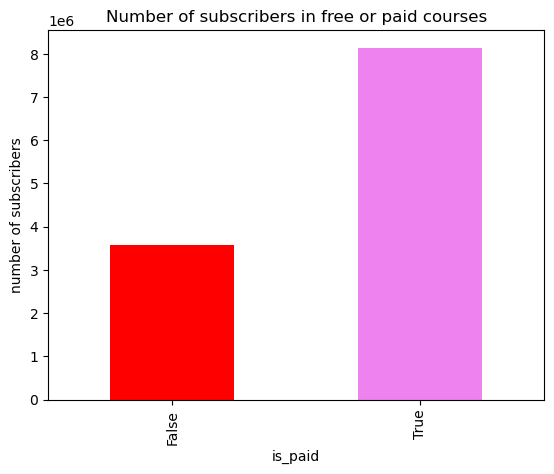

In [78]:
colors=['red','violet']
c.plot(kind='bar',ylabel='number of subscribers',color=colors)
plt.title('Number of subscribers in free or paid courses')
plt.show()

From the above graph, the courses that are paid have  over **8 million** subscrbers while the free courses have less than **4 million** subscribers.

In [80]:
# the most subscribed course
df2[df2.num_subscribers==df2.num_subscribers.max()]

,course_title,url,is_paid,price_usd,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_date
course_id,,,,,,,,,,,
41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,Web Development,2013-02-14


In [82]:
#the least subscribed course
df2[df2.num_subscribers==df2.num_subscribers.min()]

,course_title,url,is_paid,price_usd,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_date
course_id,,,,,,,,,,,
837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,Business Finance,2016-05-16
1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,Business Finance,2017-04-23
1282064,Cryptocurrency (BTC & ETH) Investment & Tradin...,https://www.udemy.com/cryptocurrency-btc-eth-i...,True,20,0,0,7,Beginner Level,2.500000,Business Finance,2017-07-06
1247992,Introduction to Project Management for Finance...,https://www.udemy.com/introduction-to-project-...,True,50,0,0,9,Beginner Level,2.000000,Business Finance,2017-07-03
1251582,Best Practices in Corporate Budgeting,https://www.udemy.com/best-practices-corporate...,True,50,0,0,9,Intermediate Level,2.000000,Business Finance,2017-06-29
...,...,...,...,...,...,...,...,...,...,...,...
1214670,Tune that Sour Note on Your Piano,https://www.udemy.com/how-to-tune-your-own-piano/,True,20,0,0,6,All Levels,0.550000,Musical Instruments,2017-06-20
1272282,Learn Vikings Soundtracks on the Piano by Ear,https://www.udemy.com/learn-vikings-soundtrack...,True,20,0,0,8,All Levels,0.583333,Musical Instruments,2017-06-29
1224186,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,True,35,0,0,13,Beginner Level,0.516667,Musical Instruments,2017-05-30


In [84]:
#longest course duration
df2[df2.content_duration==df2.content_duration.max()]

,course_title,url,is_paid,price_usd,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_date
course_id,,,,,,,,,,,
978576,The Complete Figure Drawing Course HD,https://www.udemy.com/the-complete-figure-draw...,True,50,1323,136,225,Beginner Level,78.5,Graphic Design,2016-10-11


In [86]:
# shortest course duration
df2[df2.content_duration==df2.content_duration.min()]

,course_title,url,is_paid,price_usd,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_date
course_id,,,,,,,,,,,
627332,Mutual Funds for Investors in Retirement Accounts,https://www.udemy.com/mutual-funds-for-investo...,True,20,0,0,0,All Levels,0.0,Business Finance,2015-12-17
